<a href="https://colab.research.google.com/github/sharansumbad/Twitter-Sentiment-Analysis/blob/main/Twitter_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import  matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Log.csv to Log (1).csv


In [ ]:
log = pd.read_csv('Log.csv') 

In [ ]:
#log

In [ ]:
# Twitter API Credentials

consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
accessToken = log['Key'][2]
acessTokenSecret = log['Key'][3]

In [ ]:
# Create the authentication object 
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and scess token secret
authenticate.set_access_token(accessToken, acessTokenSecret)

# Create the APi object while passing in the auth information
api = tweepy.API(authenticate , wait_on_rate_limit = True)

In [ ]:
# Exttract 100 tweets from the wtitter user
posts = api.user_timeline(screen_name = "SadhguruJV" , count = 100 , lang = "en", tweet_mode = "extended")

# print the last 5 tweets from the account
print("show the 5 recent tweets: |n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i += 1

show the 5 recent tweets: |n
1)The Nation hangs its head in shame for what #Parliament has descended to. Our hard-won Independence means little without Responsibility. Bharat’s wellbeing must override all other considerations. –Sg

2)If you are not an issue, handling outside issues will not be a problem. #SadhguruQuotes https://t.co/ZqC1RfVCe9

3)With precise Region-wise data of #ClimateChange impact, it is now possible for every Nation to legislate appropriately &amp; mitigate impact. May decision-makers show resoluteness, commitment &amp; Urgency in making this happen. –Sg @IPCC_CH @UN_SDG @UNEP #ConsciousPlanet

4)We must skill the Youth of the World to handle their body, mind, emotions &amp; energies. With this one skill- whatever their activity- they will enhance their own Life &amp; all Life around them. Without this skill, every other skill will be wasted. –Sg #InternationalYouthDay

5)Only when your experience of life moves beyond sense perception, it becomes absolute, not rela

In [ ]:
 # create a dataframe with a column called Tweets
 df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

#Show the first 10 rowa
 df.head(10)

,Tweets
0,The Nation hangs its head in shame for what #P...
1,"If you are not an issue, handling outside issu..."
2,With precise Region-wise data of #ClimateChang...
3,We must skill the Youth of the World to handle...
4,Only when your experience of life moves beyond...
5,Every Nation must prioritize #ClimateAction in...
6,Human beings become who they are not necessari...
7,This is a tremendous opportunity for Humanity ...
8,Humanity is running out of time. Decisive &amp...
9,The word Yoga means Union- if you are willing ...


In [ ]:
# clean the test

#clean a function to clean the tweets
def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '' , text ) # remove @mentions
  text = re.sub(r'#', '' , text) #Removing the '#' symbol
  text = re.sub(r'RT[\s] +', '', text) # remove RT
  text = re.sub(r'https?:\/\/\s+', '' , text) # remove the hyper link

  return text

In [ ]:
# Cleaning the text

df['Tweets'] = df['Tweets'].apply(cleantxt)

df

,Tweets
0,The Nation hangs its head in shame for what Pa...
1,"If you are not an issue, handling outside issu..."
2,With precise Region-wise data of ClimateChange...
3,We must skill the Youth of the World to handle...
4,Only when your experience of life moves beyond...
...,...
95,"As long as there is anger, irritation, hatred,..."
96,"My Best Wishes for the Olympics, Pooja. The Na..."
97,Congratulazioni Azzurri! The Beautiful Game ce...
98,DailyWisdom Life https://t.co/fRoAeiHtf3


In [ ]:
# Create a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a functionn to grt the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new datafarme with the new  columns

df

,Tweets,Subjectivity,Polarity
0,The Nation hangs its head in shame for what Pa...,0.437500,-0.156250
1,"If you are not an issue, handling outside issu...",0.050000,0.000000
2,With precise Region-wise data of ClimateChange...,0.766667,0.300000
3,We must skill the Youth of the World to handle...,0.458333,0.091667
4,Only when your experience of life moves beyond...,0.633333,0.066667
...,...,...,...
95,"As long as there is anger, irritation, hatred,...",0.366667,-0.183333
96,"My Best Wishes for the Olympics, Pooja. The Na...",0.433333,0.700000
97,Congratulazioni Azzurri! The Beautiful Game ce...,0.566667,0.483333
98,DailyWisdom Life https://t.co/fRoAeiHtf3,0.000000,0.000000


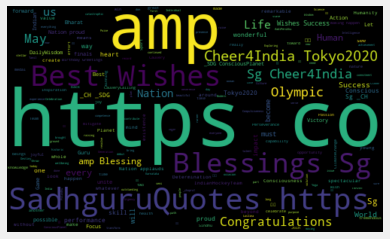

In [ ]:
# plot the  Word Cloud 
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud (width = 500, height = 300 , random_state = 21 , max_font_size = 119).generate(allWords)

plt.imshow(wordCloud , Interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
 # Create a function to cumpute the negative, neutral and positive analysis

 def getAnalysis(score):
   if score < 0:
     return 'Negative'
   elif score == 0:
     return 'Neutral'
   else:
     return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)  

#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,The Nation hangs its head in shame for what Pa...,0.437500,-0.156250,Negative
1,"If you are not an issue, handling outside issu...",0.050000,0.000000,Neutral
2,With precise Region-wise data of ClimateChange...,0.766667,0.300000,Positive
3,We must skill the Youth of the World to handle...,0.458333,0.091667,Positive
4,Only when your experience of life moves beyond...,0.633333,0.066667,Positive
...,...,...,...,...
95,"As long as there is anger, irritation, hatred,...",0.366667,-0.183333,Negative
96,"My Best Wishes for the Olympics, Pooja. The Na...",0.433333,0.700000,Positive
97,Congratulazioni Azzurri! The Beautiful Game ce...,0.566667,0.483333,Positive
98,DailyWisdom Life https://t.co/fRoAeiHtf3,0.000000,0.000000,Neutral


In [ ]:
# Print all of positive tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'])

sortedDF


,Tweets,Subjectivity,Polarity,Analysis
85,What happens within us is never determined by ...,1.000000,-0.500000,Negative
84,Painful to see the devastating impact of extre...,0.716667,-0.204167,Negative
95,"As long as there is anger, irritation, hatred,...",0.366667,-0.183333,Negative
0,The Nation hangs its head in shame for what Pa...,0.437500,-0.156250,Negative
91,"SouthAfrica, you demonstrated the Power of Non...",0.577778,-0.016667,Negative
...,...,...,...,...
71,"Sindhu, Best Wishes for the Olympics. You do u...",0.650000,0.900000,Positive
66,Congratulations Mirabai. A proud Nation applau...,0.650000,0.900000,Positive
41,"Kamalpreet, congratulations on an incredible d...",0.600000,0.950000,Positive
93,"Congratulations Novak, on joining the Gallery ...",0.300000,1.000000,Positive


In [ ]:
for i in range (0,sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1

1)With precise Region-wise data of ClimateChange impact, it is now possible for every Nation to legislate appropriately &amp; mitigate impact. May decision-makers show resoluteness, commitment &amp; Urgency in making this happen. –Sg _CH _SDG  ConsciousPlanet

2)We must skill the Youth of the World to handle their body, mind, emotions &amp; energies. With this one skill- whatever their activity- they will enhance their own Life &amp; all Life around them. Without this skill, every other skill will be wasted. –Sg InternationalYouthDay

3)Only when your experience of life moves beyond sense perception, it becomes absolute, not relative. SadhguruQuotes https://t.co/QC9f7MWBwh

4)Every Nation must prioritize ClimateAction in its political agenda. Urgent policy-driven action is the only way forward to avert catastrophic consequences of ClimateChange. –Sg _CH _SDG ConsciousPlanet

5)Human beings become who they are not necessarily because they are endowed with tremendous knowledge, capabilit

In [ ]:
# Print the negative Tweets
j = 1
SortedDF = df.sort_values(by= ['Polarity'],ascending='False') 
for i in range(0, SortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1



1)The Nation hangs its head in shame for what Parliament has descended to. Our hard-won Independence means little without Responsibility. Bharat’s wellbeing must override all other considerations. –Sg

2)Painful to see the devastating impact of extreme weather in western Europe with the unprecedented loss of life &amp; destructio n of property. May the World unite in preventing such climatic upheavals by investing in regenerating the planet. – Sg https://t.co/x5iCRVWWAo

3)What happens within us is never determined by what is happening around us. But unfortunately, we link it to what is happening around us. SadhguruQuotes https://t.co/B6LrCGmyk0

4)SouthAfrica, you demonstrated the Power of Non-Violence to the world at the most difficult time in your history. Painful to see you bleed today. May you Unite &amp; and build back the Strong, Vibrant Nation that we all know &amp; admire. Blessings. – Sg https://t.co/tFUF6f29rO

5)As long as there is anger, irritation, hatred, jealousy, and i

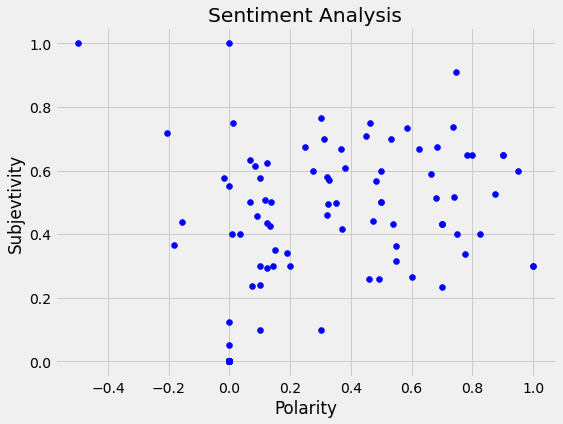

In [ ]:
# PLot the polarity and Subjectivity

plt.figure(figsize = (8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjevtivity')
plt.show()

In [ ]:
# Get the percentage of Positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

ptweets

round((ptweets.shape[0]/df.shape[0])*100, 1 )

72.0

In [ ]:
# Get the percentage of Negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

ntweets

round((ntweets.shape[0]/df.shape[0])*100, 1 )

5.0

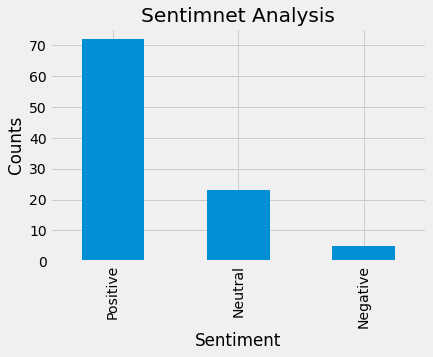

In [ ]:
# Show the Value Counts

df['Analysis'].value_counts()


# Plot and visualise the counts
plt.title('Sentimnet Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# reference https://www.youtube.com/watch?v=ujId4ipkBio&t=498s

